# Amino Acid calculator

### Welcome to project 1 of code grand rounds! It is in this section (as well as the following projects) where we will aim to tie together the concepts from the basics notebooks and apply them to some real medical problems. A lot of these projects will be pretty basic and there will definitely be other tools available to achieve similar results that we are doing here, but the point is to learn how code gets put together to solve an abstract problem

### In this notebook we will be working on developing an algorithm that takes as input a DNA sequence and returns the corresponsing amino acid sequence. We will leverage our knowledge about the central dogma of biology to construct this, and use fundamental data structures and logic operations from Python (dictionaries, for loops, lists, etc). We will be working with the albumin gene, as it is the most common protein in the blood, and it seemed like a good place to start! We took the DNA sequence from this link: hmdb.ca/proteins/HMDBP02075. We edited the sequence a little bit, but left the fasta header (fasta is the common file type for gene/ protein files) to provide practice dealing with artefacts in data (as is common in the real world!).

### Let's get to it!

## Import amino acid sequence

### The first step in this process is to load our data into our algorithm. Locally, you would do this by assigning the file path to the file containing your data. Data in your computer is stored in a tree like format, where the full file path starts at the upper layer. On a mac this might read like 'Users/your_name/Desktop/Folder/Sub_Folder/file.ext'. However, you can also use relative paths to denote the location of files. Relative paths rely on your working directory (wherever the file of your code lives) so you only have to assign the name of your actual file. For example, if you are in your working directory and your file(s) of interest is in the same directory, you could just do var = 'file.ext' and Python would know where to look. On the code grand rounds website, we store our data in a dictionary on the backend, so we reference files slightly differently using a the commands 'data_dict'. This is just a feature of our website, and if you download the code you will see the real implementation.

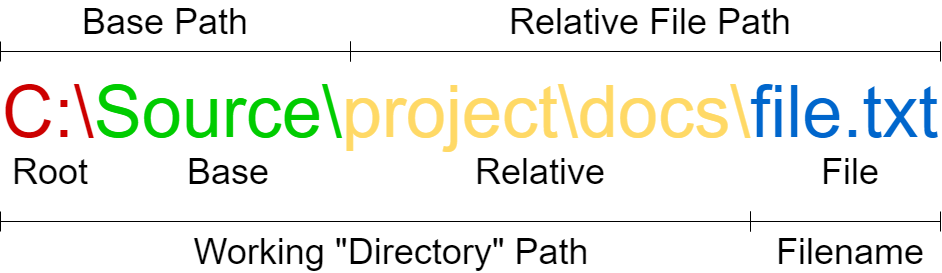

### Lets start by getting our gene file loaded:

In [ ]:
## define path to albumin gene txt file

albumin_gene_file =  'albumin_gene.txt'

### Now that we have the file loaded, we need to open it and do some stff with it. In Python, the command 'with open' is how you do this. 'with' sets up some temporary stuff on your computer to ensure the file closes after, and 'open(albumin_gene_file, "r") as file:' actually opens the file and creates a variable of it called 'file'. The 'r' denotes read mode, so the file can only be read.

### Once we actually open the file, we want to then go and do stuff with it. For this, we will chain together various string commands (as the file is a txt file we will read it as a string). 'file.read' kicks off the sequence of events, '.strip' removes any leading or trailing white space, '.split()' then splits the initial string into a list of strings based on this weird '\n' character. In Python, this denotes a new line, and is just how the computer knows to go down a line. After this, we use the (soon to be) familiar list index notation '[1:]' to tell the computer that we want to take every line but the first. We do this because we want to omit the Fasta header from our downstream analysis where we will find the amino acid sequence associated with the gene. After all this is said and done, we essentially have a list of every line in the original file, except the first one. However, we want to rejoin all of this data back into a single list without the new line characters, so to do this we will use '\n.join' which merges all the items into the list using the '\n' character. So by the end, we have one long list of amino acids that we sucessfully extracted! We also want to ger rid of the new line characters as they are not part of our gene, so we will replace them all with nothing '''' in order to have a single list of amino acids.

In [ ]:
# Open the file in read mode
with open(albumin_gene_file, 'r') as file:
    # Read the entire content of the file
    # .read() reads the file
    # .strip() removes any leading or trailin white space
    # .split('\n') makes a temporary list of all elements using \n as a separator(makes a new list of every line)
    # [1:] says selects the second line of the file to the end (because we dont want the header line!)
    # '\n.join' rebuilds the list using the \n character as as separator (because that is what we split on!)
    gene_sequence = '\n'.join(file.read().strip().split('\n')[1:])

#remove pesky new line characters once and for all
gene_sequence=gene_sequence.replace('\n', '')

print(type(gene_sequence))
print(gene_sequence)


### While this may not seem like much, it is a very important principle. Often if not all times, you are building code to interact with some form of data you have on your personal computer. Your code doesn't just magically know where to go to find it, rather you have to tell it explcitly, and you also have to do some post processing on it in order to get it ready to perform downstream analyses. You wil see how to do this process in many ways throughout Code Grand Rounds!

### Now, we will do a sanity chec to make sure we have the correct number of nucleotides in our gene file to determine the amino acid makeup down the road. We Need to make sure that the length of our list is divisible by 3 (as we know that three nucleotides make an amino acid), and we can check that using the modulus ('%') operator. This returns the remainder of two things divided by each other, and since we need to make sure the list of amino acids is easily divisible by 3 we can just check that the remainder is 0. If it is not, we should print that the length of the sequence is not divisible by 3

In [ ]:
# Make sure the DNA sequence length is divisible by 3
# try changing this number and see what happens
if len(gene_sequence) % 3 != 0:
    print("DNA sequence not divisible by 3")

### Now that we have gotten our data into a workable file and confirmed that it is length that makes sense, we can move on to the next step. As our plan is to find the amino acid sequence from the genes, we can start by making a new list of codons from the dna sequence. In this new list we will add every three items from the gene list to build a list of the codons that make up the gene. We can then attempt to map this to the real amino acids using the codon library.

### For this, we will iterate through our gene list, and when we are iterating through anything in Python we use for loops (at least most times...) What we want to do is iterate from 0-the length of the sequence, BUT, we want to count up by three each time in order to see a new codon after each iteration. Feel free to add some print statements in here to visualize what is happening. This also means that as we iterate, i will start at 0, and then go to 3, and then go to 6, and so on and so forth. 

### In order to fill out our new list of codons, we need to append the first element of the gene sequence up to the third (index 0 and 2 respectively). To do this, we will use list indexing like we have seen already, but we will index over a range of values instead of a single one. To do this, we use the syntax 'list[start_index:end_index]'. This can be a little confusing, because the start of the list index is inclusive (meaning if it is 0 the indexing will start at that element) but the last element is exclusive (meaning it will store up to that value, not including the value). To do this, we can index the original gene sequence from position 0 through 3 on the first iteration to get the first three iterations. We will then index position 3 to 6 on the second iteration, and so on and so forthh. This takes practice, but once you get it you got it!

In [ ]:
# Split the gene sequence into codons
# this loop starts at 0 and goes til the length of our gene, incrementing by 3 at each step (0,3,6,9...)
# append appends each substring from gene sequence as a codon
albumin_codons = []
for i in range(0, len(gene_sequence), 3):
    albumin_codons.append(gene_sequence[i:i+3])

# Print the list of codons
print(albumin_codons)

## Define Dictionary to Relate Codons to Amino Acids

### This part is pretty straight forward, albeit a little labor intensive on the first go. We now have a list of codons, and we want to generate an amino acid sequence from this list, so we are very close to achieving our final goal. To do this however, we will need to create some kind of map that relates our codons to the known amino acids they correspond to. We will make use of a dictionary for this due to how they store data using 'key:value' pairs. We will z the key in this scenario our codon, and the value the amino acid the codon maps to. This will allow us to iterate through our codon list and identify the amino acid it corresponds to by looking it up in this dictinoary. Remember that dictionaries are defined uising curley brackets '{}"

In [ ]:
#Dictionary with key: value pairs codon: amino acid respectively
codon_table = {
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S',
    'TAT': 'Y', 'TAC': 'Y', 'TAA': '*', 'TAG': '*',
    'TGT': 'C', 'TGC': 'C', 'TGA': '*', 'TGG': 'W',
    'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
}

### We are finally ready to put it all together and build our amino acid sequence. To do this, we will first create an empty string in order to iteratively build the amino acid chain. You could also do this using a list, but that would entail joining everything at the end so this is a slightly cleaner approach.  We will then iterate through our codon list and use our dictionary to find the corresponding amino acid. We can do this using the built in 'get' method after the dictionary to perform the lookup and retrieve the value the codon key was associated with. If for some reason it cannot find the codon in the dictionary, it will insert an 'X' into our amino acid sequence. Give it a try!

In [ ]:
calculated_amino_acid_sequence = ''

for codon in albumin_codons:
    # get is a command that returns the value for a given key in a dictionary
    # An X will get inserted for unknown codons
    amino_acid = codon_table.get(codon, 'X')  
    calculated_amino_acid_sequence += amino_acid

print(calculated_amino_acid_sequence)

## Check results

### Lets now see how well our calculator did! We also downloaded the albumin amino acid sequence from the protein data base, and we can do the same process of inputting and formatting the file that we did for our gene file. We will read it in, remove trailing white space, make a list of every line separating by the new line character, and then rejoin the whole list so we have one long list of amino acids. We will cap it off by removing the new linw characters.

In [ ]:
# For every matching amino acid in the reference file, check if we got the same amino acid and compute a percentile score
albumin_aa_file =  'albumin_aa.txt'

# Open the file in read mode
with open(albumin_aa_file, 'r') as file:
    # Read the entire content of the file
    # .read() reads the file
    # .strip() removes any leading or trailin white space
    # .split('\n') makes a temporary list of all elements using \n as a separator(makes a new list of every line)
    # [1:] says selects the second line of the file to the end (because we dont want the header line!)
    # '\n.join' rebuilds the list using the \n character as as separator (because that is what we split on!)
    true_aa_sequence = '\n'.join(file.read().strip().split('\n')[1:])

#remove pesky new line characters once and for all
true_aa_sequence=true_aa_sequence.replace('\n', '')


### Now lets compare our calculated amino acid sequence to the true amino acid sequence we just imported and formatted. The idea here is simple: we want to check how many amino acids are the same between each sequence ()at the same location, and then divide the number of similar amino acids by the length of the true amino acid sequence in order to get our percent accuracy.

### To do this we will iterate from range 0 to the length of the true amino acid sequence (so i is 0 the first iteration, 1 the second iteration, and so on and so forth) and then perform a check for equality using the '==' (note 2 equals signs!) to compare.

### We will then employ an if else statement: if amino acids at the same position are the same, increase our numerator by 1. if not, we can print that there was no match. We can cap it all off by calculating our result using division in python,

In [ ]:
# this will get updated soon
score_numerator = 0 
# we use the length of the true amino acid sequence as our dictionary has a * for stop codons which is not present in the 
# true aa sequence. this makes true aa sequence < calculated aa sequence by 1 amino acid
score_denominator = len(true_aa_sequence)

# check how many we got right and print out the indices of incorrect amino acids
for i in range(0,len(true_aa_sequence)):
    if calculated_amino_acid_sequence[i] == true_aa_sequence[i]:
        score_numerator += 1
    else:
        print('No match!')
    
result = score_numerator/score_denominator  
print(round(result,4))

## We got two incorrect! Not bad! While this was a simple example, we hope you saw how what would be a really time consuming process by hand is rapidly automatable in Python. In addition, the execution of this code follows basically the same steps you as a human would, it just encodes them in software so you only have to think it once and then can use it for any gene sequence! It is notably harder to go the other way (amino acids to codons) as muiltiple codons can encode for the same amino acid, but feel free to give it a try. Another fun task is to try to mRNA from DNA! We hope you had fun, and we will see you in the next project where we will be analyzing ECGs.